<a href="https://colab.research.google.com/github/curiousanalyst-0/netflix-dashboard/blob/main/Weather_Data_Visualiser_(API_based).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter city names (comma-separated): DELHI,TOKYO

📍 City: Delhi
🌡️ Temperature: 32.05°C
💧 Humidity: 43%
🌥️ Weather: haze

📍 City: Tokyo
🌡️ Temperature: 15.72°C
💧 Humidity: 85%
🌥️ Weather: moderate rain


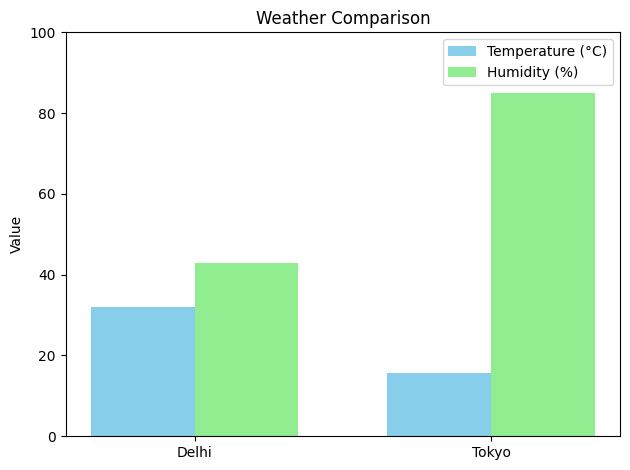

In [1]:
import requests
import matplotlib.pyplot as plt

API_KEY = 'b2ff825335699e513f7a88fe1bb33544'

# Input multiple cities, comma-separated
cities_input = input("Enter city names (comma-separated): ")
cities = [city.strip() for city in cities_input.split(',')]

temperatures = []
humidities = []
city_names = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        name = data['name']
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        desc = data['weather'][0]['description']

        print(f"\n📍 City: {name}")
        print(f"🌡️ Temperature: {temp}°C")
        print(f"💧 Humidity: {humidity}%")
        print(f"🌥️ Weather: {desc}")

        city_names.append(name)
        temperatures.append(temp)
        humidities.append(humidity)
    else:
        print(f"\n⚠️ Could not retrieve data for '{city}': {data.get('message', 'Unknown error')}")

# Plot if at least 1 city was successful
if city_names:
    x = range(len(city_names))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, temperatures, width, label='Temperature (°C)', color='skyblue')
    ax.bar([i + width for i in x], humidities, width, label='Humidity (%)', color='lightgreen')

    ax.set_ylabel('Value')
    ax.set_title('Weather Comparison')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(city_names)
    ax.set_ylim(0, 100)
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid cities to display.")
